Code in this notebook is very slightly modified version of code found here https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

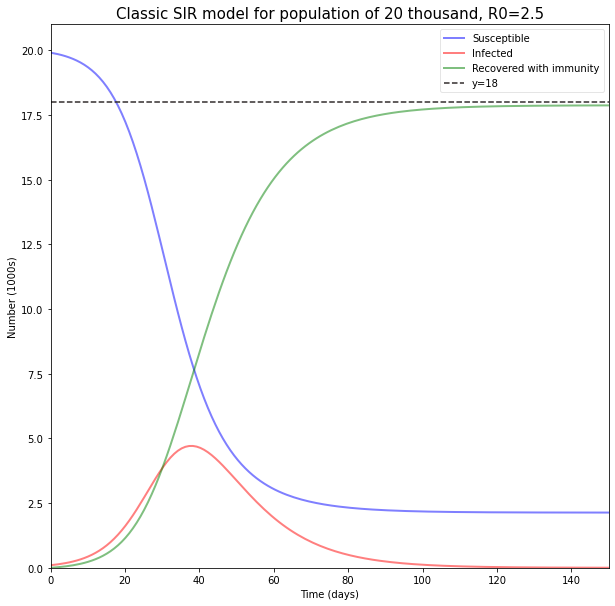

In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 20000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.25, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_title("Classic SIR model for population of 20 thousand, R0=2.5", fontsize=15)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,21)
ax.set_xlim(0,150)
ax.axhline(y=18, linestyle='--', color='#302B2B', label='y=18')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)

fig.savefig(r"Figures\ClassicSIR.png")

plt.show()